In [23]:
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider
import matplotlib.pyplot as plt
from mlp.initialisers import UniformInit
%matplotlib inline

plt.style.use('ggplot')
# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)

# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = MNISTDataProvider('train', batch_size=50, rng=rng)
valid_data = MNISTDataProvider('valid', batch_size=50, rng=rng)

In [24]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.schedulers import MomentumCoefficientLearningScheduler
from mlp.learning_rules import MomentumLearningRule
from mlp.optimisers  import Optimiser
from mlp.learning_rules import GradientDescentLearningRule
input_dim, output_dim, hidden_dim = 784, 10, 100


error = CrossEntropySoftmaxError()
num_epochs = 100  # number of training epochs to perform
stats_interval = 5
batch_size = 50  # number of data points in a batch
init_scale = 0.01


learning_rate=0.05
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
rng.seed(seed)
train_data.reset()
valid_data.reset()
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size
param_init = UniformInit(-init_scale, init_scale, rng=rng)
error = CrossEntropySoftmaxError()


In [25]:


model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])
def train_model_nomom(model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval):
    
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    optimiser = Optimiser(model, error, learning_rule, train_data, valid_data, data_monitors)
    global stats1, keys1, run_time1
    stats1, keys1, run_time1 = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)
    return stats1, keys1, run_time1

_= train_model_nomom(model, error, GradientDescentLearningRule(learning_rate), train_data, valid_data, num_epochs, stats_interval)

Epoch 5: 2.01s to complete
    error(train)=3.35e-01, acc(train)=9.06e-01, error(valid)=3.12e-01, acc(valid)=9.11e-01
Epoch 10: 1.47s to complete
    error(train)=2.50e-01, acc(train)=9.27e-01, error(valid)=2.37e-01, acc(valid)=9.31e-01
Epoch 15: 1.44s to complete
    error(train)=2.03e-01, acc(train)=9.41e-01, error(valid)=1.95e-01, acc(valid)=9.45e-01
Epoch 20: 1.43s to complete
    error(train)=1.69e-01, acc(train)=9.51e-01, error(valid)=1.67e-01, acc(valid)=9.54e-01
Epoch 25: 1.40s to complete
    error(train)=1.44e-01, acc(train)=9.58e-01, error(valid)=1.48e-01, acc(valid)=9.60e-01
Epoch 30: 1.62s to complete
    error(train)=1.24e-01, acc(train)=9.64e-01, error(valid)=1.34e-01, acc(valid)=9.62e-01
Epoch 35: 1.67s to complete
    error(train)=1.09e-01, acc(train)=9.69e-01, error(valid)=1.24e-01, acc(valid)=9.66e-01
Epoch 40: 1.90s to complete
    error(train)=9.52e-02, acc(train)=9.73e-01, error(valid)=1.15e-01, acc(valid)=9.67e-01
Epoch 45: 1.45s to complete
    error(train)=8.36

In [26]:
##mom_coeff=0.9
error = CrossEntropySoftmaxError()
num_epochs = 100  # number of training epochs to perform
stats_interval = 5
batch_size = 50  # number of data points in a batch
init_scale = 0.01


learning_rate=0.05
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
rng.seed(seed)
train_data.reset()
valid_data.reset()
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size
param_init = UniformInit(-init_scale, init_scale, rng=rng)
error = CrossEntropySoftmaxError()

def train_model_mom2(model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval):
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}
    optimiser = Optimiser(model, error, learning_rule, train_data, valid_data, data_monitors)
    global stats2, keys2, run_time2
    stats2, keys2, run_time2 = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)
    return stats2, keys2, run_time2


model_mom2 = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])
learning_rule_mom2=MomentumLearningRule(learning_rate=0.05,mom_coeff=0.9)
_= train_model_mom2(model_mom2, error,learning_rule_mom2, train_data, valid_data, num_epochs, stats_interval)

Epoch 5: 1.77s to complete
    error(train)=9.50e-02, acc(train)=9.72e-01, error(valid)=1.15e-01, acc(valid)=9.66e-01
Epoch 10: 2.51s to complete
    error(train)=4.17e-02, acc(train)=9.88e-01, error(valid)=9.12e-02, acc(valid)=9.73e-01
Epoch 15: 1.79s to complete
    error(train)=2.33e-02, acc(train)=9.94e-01, error(valid)=8.61e-02, acc(valid)=9.75e-01
Epoch 20: 1.68s to complete
    error(train)=1.61e-02, acc(train)=9.96e-01, error(valid)=9.63e-02, acc(valid)=9.74e-01
Epoch 25: 1.73s to complete
    error(train)=4.69e-03, acc(train)=1.00e+00, error(valid)=8.64e-02, acc(valid)=9.77e-01
Epoch 30: 3.71s to complete
    error(train)=2.62e-03, acc(train)=1.00e+00, error(valid)=8.87e-02, acc(valid)=9.78e-01
Epoch 35: 1.89s to complete
    error(train)=1.94e-03, acc(train)=1.00e+00, error(valid)=9.33e-02, acc(valid)=9.78e-01
Epoch 40: 2.27s to complete
    error(train)=1.35e-03, acc(train)=1.00e+00, error(valid)=9.38e-02, acc(valid)=9.79e-01
Epoch 45: 1.90s to complete
    error(train)=1.12

In [27]:
##momentum co with 0.5
error = CrossEntropySoftmaxError()
num_epochs = 100  # number of training epochs to perform
stats_interval = 5
batch_size = 50  # number of data points in a batch
init_scale = 0.01


learning_rate=0.05
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
rng.seed(seed)
train_data.reset()
valid_data.reset()
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size
param_init = UniformInit(-init_scale, init_scale, rng=rng)
error = CrossEntropySoftmaxError()
def train_model_mom3(model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval):
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}
    optimiser = Optimiser(model, error, learning_rule, train_data, valid_data, data_monitors)
    global stats3, keys3, run_time3
    stats3, keys3, run_time3 = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)
    return stats3, keys3, run_time3


model_mom3 = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

learning_rule_mom3=MomentumLearningRule(learning_rate=0.05, mom_coeff=0.5)
_= train_model_mom3(model_mom3, error,learning_rule_mom3, train_data, valid_data, num_epochs, stats_interval)

Epoch 5: 1.77s to complete
    error(train)=2.53e-01, acc(train)=9.26e-01, error(valid)=2.40e-01, acc(valid)=9.29e-01
Epoch 10: 1.77s to complete
    error(train)=1.69e-01, acc(train)=9.51e-01, error(valid)=1.68e-01, acc(valid)=9.53e-01
Epoch 15: 1.65s to complete
    error(train)=1.25e-01, acc(train)=9.64e-01, error(valid)=1.36e-01, acc(valid)=9.63e-01
Epoch 20: 2.02s to complete
    error(train)=9.81e-02, acc(train)=9.73e-01, error(valid)=1.18e-01, acc(valid)=9.67e-01
Epoch 25: 2.28s to complete
    error(train)=7.76e-02, acc(train)=9.79e-01, error(valid)=1.05e-01, acc(valid)=9.70e-01
Epoch 30: 1.69s to complete
    error(train)=6.33e-02, acc(train)=9.83e-01, error(valid)=9.78e-02, acc(valid)=9.72e-01
Epoch 35: 1.60s to complete
    error(train)=5.21e-02, acc(train)=9.86e-01, error(valid)=9.45e-02, acc(valid)=9.73e-01
Epoch 40: 1.84s to complete
    error(train)=4.22e-02, acc(train)=9.90e-01, error(valid)=8.88e-02, acc(valid)=9.75e-01
Epoch 45: 2.02s to complete
    error(train)=3.41

In [28]:
error = CrossEntropySoftmaxError()
num_epochs = 100  # number of training epochs to perform
stats_interval = 5
batch_size = 50  # number of data points in a batch
init_scale = 0.01


learning_rate=0.05
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
rng.seed(seed)
train_data.reset()
valid_data.reset()
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size
param_init = UniformInit(-init_scale, init_scale, rng=rng)
error = CrossEntropySoftmaxError()
def train_model_mom4(model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval):
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}
    optimiser = Optimiser(model, error, learning_rule, train_data, valid_data, data_monitors)
    global stats4, keys4, run_time4
    stats4, keys4, run_time4 = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)
    return stats4, keys4, run_time4


model_mom4 = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

learning_rule_mom4=MomentumLearningRule(learning_rate=0.05, mom_coeff=0.1)
_= train_model_mom4(model_mom4, error,learning_rule_mom4, train_data, valid_data, num_epochs, stats_interval)

Epoch 5: 1.63s to complete
    error(train)=3.21e-01, acc(train)=9.09e-01, error(valid)=3.00e-01, acc(valid)=9.14e-01
Epoch 10: 1.76s to complete
    error(train)=2.38e-01, acc(train)=9.30e-01, error(valid)=2.26e-01, acc(valid)=9.36e-01
Epoch 15: 1.86s to complete
    error(train)=1.90e-01, acc(train)=9.45e-01, error(valid)=1.85e-01, acc(valid)=9.49e-01
Epoch 20: 2.10s to complete
    error(train)=1.57e-01, acc(train)=9.55e-01, error(valid)=1.58e-01, acc(valid)=9.57e-01
Epoch 25: 1.74s to complete
    error(train)=1.33e-01, acc(train)=9.62e-01, error(valid)=1.40e-01, acc(valid)=9.61e-01
Epoch 30: 1.69s to complete
    error(train)=1.13e-01, acc(train)=9.68e-01, error(valid)=1.27e-01, acc(valid)=9.64e-01
Epoch 35: 2.31s to complete
    error(train)=9.85e-02, acc(train)=9.72e-01, error(valid)=1.18e-01, acc(valid)=9.68e-01
Epoch 40: 1.68s to complete
    error(train)=8.58e-02, acc(train)=9.77e-01, error(valid)=1.10e-01, acc(valid)=9.69e-01
Epoch 45: 1.70s to complete
    error(train)=7.47

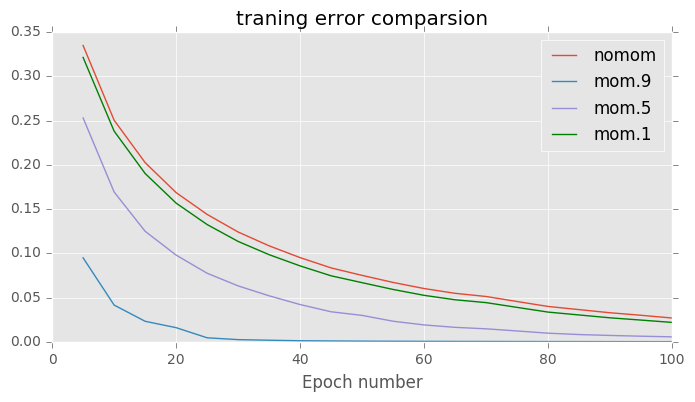

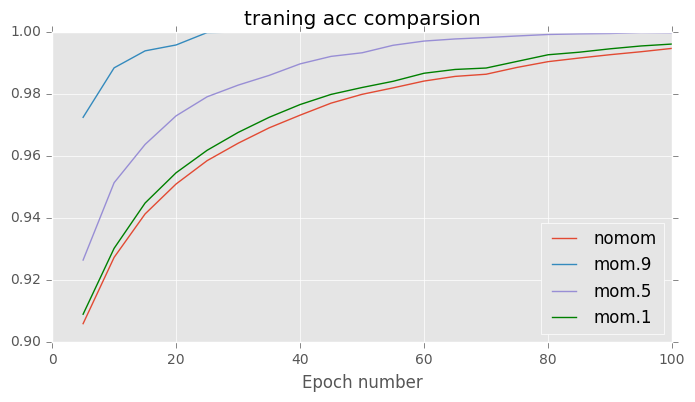

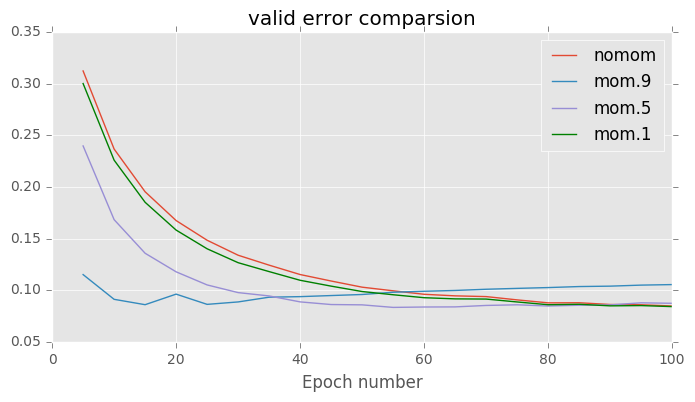

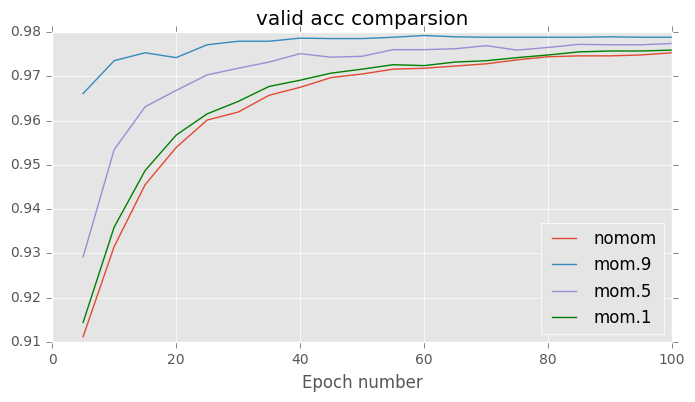

In [29]:
##Compare the performance of a basic gradient descent learning rule to the momentum learning rule for
##several values of the momentum coefficient α.##
#Interpret how the momentum coefficient α influences training.
#Include plots of the error and accuracy training curves across the training epochs, for the different
#momentum coefficients you test.

def plt_stats_error(stats,stats2,stats3,stats4,keys,keys2,keys3,keys4):
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, stats1[1:, keys1[k]], label='nomom')
        ax_1.plot(np.arange(1, stats2.shape[0]) * stats_interval, stats2[1:, keys2[k]], label='mom.9')
        ax_1.plot(np.arange(1, stats3.shape[0]) * stats_interval, stats3[1:, keys3[k]], label='mom.5')
        ax_1.plot(np.arange(1, stats4.shape[0]) * stats_interval, stats4[1:, keys4[k]], label='mom.1',color='g')
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    plt.title('traning error comparsion')
    
    
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)    
    for k in ['acc(train)']:
        ax_2.plot(np.arange(1, stats1.shape[0]) * stats_interval, stats1[1:, keys1[k]], label='nomom')
        ax_2.plot(np.arange(1, stats2.shape[0]) * stats_interval, stats2[1:, keys2[k]], label='mom.9')
        ax_2.plot(np.arange(1, stats3.shape[0]) * stats_interval, stats3[1:, keys3[k]], label='mom.5')
        ax_2.plot(np.arange(1, stats4.shape[0]) * stats_interval, stats4[1:, keys4[k]], label='mom.1',color='g')
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    plt.title('traning acc comparsion')


    fig_3 = plt.figure(figsize=(8, 4))
    ax_3 = fig_3.add_subplot(111)
    for k in ['error(valid)']:
        ax_3.plot(np.arange(1, stats.shape[0]) * stats_interval, stats1[1:, keys1[k]], label='nomom')
        ax_3.plot(np.arange(1, stats2.shape[0]) * stats_interval, stats2[1:, keys2[k]], label='mom.9')
        ax_3.plot(np.arange(1, stats3.shape[0]) * stats_interval, stats3[1:, keys3[k]], label='mom.5')
        ax_3.plot(np.arange(1, stats4.shape[0]) * stats_interval, stats4[1:, keys4[k]], label='mom.1',color='g')
    ax_3.legend(loc=0)
    ax_3.set_xlabel('Epoch number')
    plt.title('valid error comparsion')
    
    fig_4 = plt.figure(figsize=(8, 4))
    ax_4 = fig_4.add_subplot(111)
    for k in ['acc(valid)']:
        ax_4.plot(np.arange(1, stats.shape[0]) * stats_interval, stats1[1:, keys1[k]], label='nomom')
        ax_4.plot(np.arange(1, stats2.shape[0]) * stats_interval, stats2[1:, keys2[k]], label='mom.9')
        ax_4.plot(np.arange(1, stats3.shape[0]) * stats_interval, stats3[1:, keys3[k]], label='mom.5')
        ax_4.plot(np.arange(1, stats4.shape[0]) * stats_interval, stats4[1:, keys4[k]], label='mom.1',color='g')
    ax_4.legend(loc=0)
    ax_4.set_xlabel('Epoch number')
    plt.title('valid acc comparsion')
    

    
    return fig_1, ax_1, fig_2, ax_2 , fig_3, ax_3, fig_4, ax_4
_=plt_stats_error(stats1,stats2,stats3,stats4,keys1,keys2,keys3,keys4)

In [32]:
###tau=10, gama=5,alpaha_infin=0.5
def train_model_mom5(model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval):
    
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}
    
    mom_scheduler= [MomentumCoefficientLearningScheduler(learning_rate, alpha_infin, gama, tau )]
    
    asy_optimiser = Optimiser(model, error, learning_rule, train_data, valid_data, data_monitors,mom_scheduler)
    global stats5, keys5, run_time5
    stats5, keys5, run_time5 = asy_optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)
    return stats5, keys5, run_time5

input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
###using asymptotic momentum coefficient to update momentum coefficient

num_epochs = 100 # number of training epochs to perform
stats_interval = 5
tau=10
gama=5
batch_size = 50  # number of data points in a batch
init_scale = 0.01
alpha_infin=0.5
learning_rate = 0.01

rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size
# Create a parameter initialiser which will sample random uniform values
# from [-init_scale, init_scale]
param_init = UniformInit(-init_scale, init_scale, rng=rng)
learning_rule_momasy=MomentumLearningRule(learning_rate=0.01, mom_coeff=0.9)

_=train_model_mom5(model,error,learning_rule_momasy,train_data, valid_data, num_epochs, stats_interval)

Epoch 5: 2.06s to complete
    error(train)=5.65e-01, acc(train)=8.51e-01, error(valid)=5.27e-01, acc(valid)=8.67e-01
Epoch 10: 1.83s to complete
    error(train)=3.69e-01, acc(train)=8.97e-01, error(valid)=3.42e-01, acc(valid)=9.06e-01
Epoch 15: 1.78s to complete
    error(train)=3.15e-01, acc(train)=9.10e-01, error(valid)=2.93e-01, acc(valid)=9.15e-01
Epoch 20: 1.70s to complete
    error(train)=2.82e-01, acc(train)=9.18e-01, error(valid)=2.64e-01, acc(valid)=9.22e-01
Epoch 25: 2.28s to complete
    error(train)=2.57e-01, acc(train)=9.25e-01, error(valid)=2.42e-01, acc(valid)=9.28e-01
Epoch 30: 1.60s to complete
    error(train)=2.34e-01, acc(train)=9.33e-01, error(valid)=2.22e-01, acc(valid)=9.37e-01
Epoch 35: 1.68s to complete
    error(train)=2.14e-01, acc(train)=9.38e-01, error(valid)=2.04e-01, acc(valid)=9.43e-01
Epoch 40: 2.77s to complete
    error(train)=1.96e-01, acc(train)=9.43e-01, error(valid)=1.89e-01, acc(valid)=9.48e-01
Epoch 45: 1.73s to complete
    error(train)=1.80

In [37]:
##tau=50  gama=10  alpha_infin=0.9
input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])


num_epochs = 100 
stats_interval = 5
tau=50
gama=10
batch_size = 50
init_scale = 0.01
alpha_infin=0.5
learning_rate = 0.01

rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size
# Create a parameter initialiser which will sample random uniform values
# from [-init_scale, init_scale]
param_init = UniformInit(-init_scale, init_scale, rng=rng)
def train_model_mom6(model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval):
    
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}
    
    mom_scheduler= [MomentumCoefficientLearningScheduler(learning_rate, alpha_infin, gama, tau )]
    
    asy_optimiser = Optimiser(model, error, learning_rule, train_data, valid_data, data_monitors,mom_scheduler)
    global stats6, keys6, run_time6
    stats6, keys6, run_time6 = asy_optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)
    return stats6, keys6, run_time6

input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])
_=train_model_mom6(model,error,learning_rule_momasy,train_data, valid_data, num_epochs, stats_interval)

Epoch 5: 2.07s to complete
    error(train)=5.64e-01, acc(train)=8.49e-01, error(valid)=5.29e-01, acc(valid)=8.64e-01
Epoch 10: 2.27s to complete
    error(train)=3.67e-01, acc(train)=8.98e-01, error(valid)=3.43e-01, acc(valid)=9.05e-01
Epoch 15: 1.57s to complete
    error(train)=3.10e-01, acc(train)=9.11e-01, error(valid)=2.90e-01, acc(valid)=9.17e-01
Epoch 20: 1.73s to complete
    error(train)=2.76e-01, acc(train)=9.20e-01, error(valid)=2.59e-01, acc(valid)=9.25e-01
Epoch 25: 1.59s to complete
    error(train)=2.49e-01, acc(train)=9.27e-01, error(valid)=2.35e-01, acc(valid)=9.32e-01
Epoch 30: 2.90s to complete
    error(train)=2.28e-01, acc(train)=9.34e-01, error(valid)=2.16e-01, acc(valid)=9.39e-01
Epoch 35: 1.70s to complete
    error(train)=2.09e-01, acc(train)=9.40e-01, error(valid)=2.01e-01, acc(valid)=9.44e-01
Epoch 40: 1.59s to complete
    error(train)=1.94e-01, acc(train)=9.44e-01, error(valid)=1.88e-01, acc(valid)=9.48e-01
Epoch 45: 1.87s to complete
    error(train)=1.80

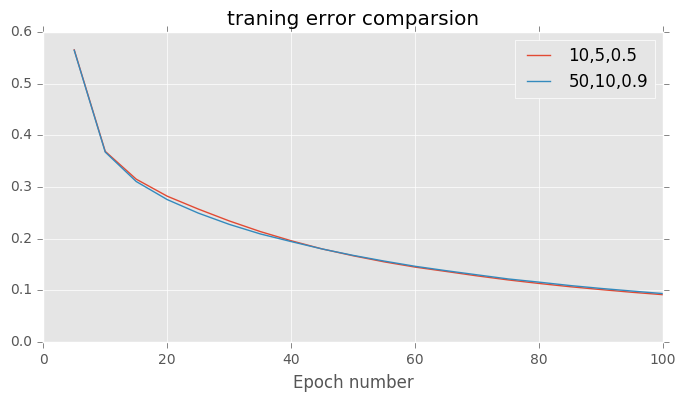

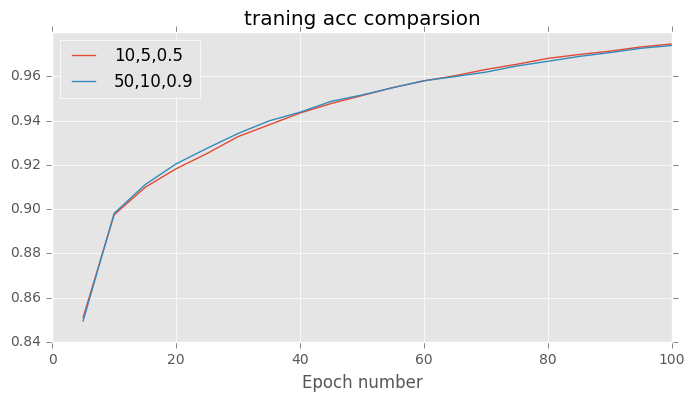

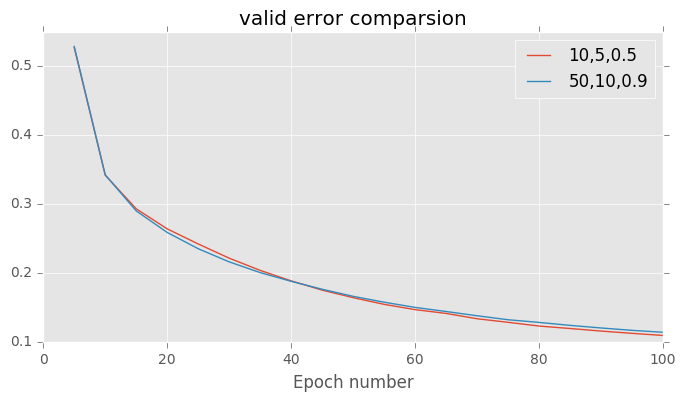

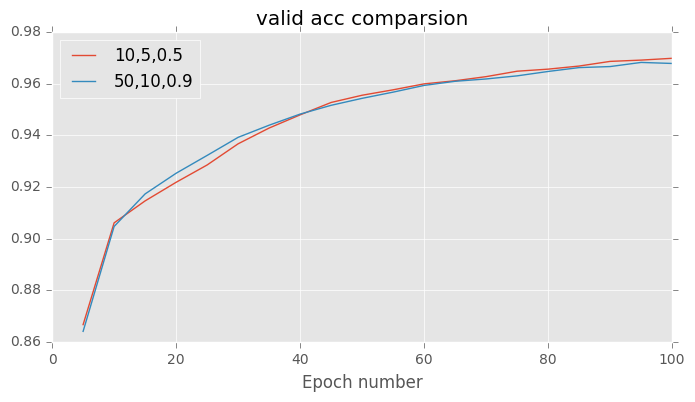

In [44]:
def plt_stats_error(stats5,stats6,keys5,keys6):
    fig_5 = plt.figure(figsize=(8, 4))
    ax_5 = fig_5.add_subplot(111)
    for k in ['error(train)']:
        ax_5.plot(np.arange(1, stats5.shape[0]) * stats_interval, stats5[1:, keys5[k]], label='10,5,0.5')
        ax_5.plot(np.arange(1, stats6.shape[0]) * stats_interval, stats6[1:, keys6[k]], label='50,10,0.9')
        
    ax_5.legend(loc=0)
    ax_5.set_xlabel('Epoch number')
    plt.title('traning error comparsion')
    
    
    fig_6 = plt.figure(figsize=(8, 4))
    ax_6 = fig_6.add_subplot(111)    
    for k in ['acc(train)']:
        ax_6.plot(np.arange(1, stats5.shape[0]) * stats_interval, stats5[1:, keys5[k]], label='10,5,0.5')
        ax_6.plot(np.arange(1, stats6.shape[0]) * stats_interval, stats6[1:, keys6[k]], label='50,10,0.9')
    ax_6.legend(loc=0)
    ax_6.set_xlabel('Epoch number')
    plt.title('traning acc comparsion')


    fig_7 = plt.figure(figsize=(8, 4))
    ax_7 = fig_7.add_subplot(111)
    for k in ['error(valid)']:
        ax_7.plot(np.arange(1, stats5.shape[0]) * stats_interval, stats5[1:, keys5[k]], label='10,5,0.5')
        ax_7.plot(np.arange(1, stats6.shape[0]) * stats_interval, stats6[1:, keys6[k]], label='50,10,0.9')
        
    ax_7.legend(loc=0)
    ax_7.set_xlabel('Epoch number')
    plt.title('valid error comparsion')
    
    fig_8 = plt.figure(figsize=(8, 4))
    ax_8 = fig_8.add_subplot(111)
    for k in ['acc(valid)']:
        ax_8.plot(np.arange(1, stats5.shape[0]) * stats_interval, stats5[1:, keys5[k]], label='10,5,0.5')
        ax_8.plot(np.arange(1, stats6.shape[0]) * stats_interval, stats6[1:, keys6[k]], label='50,10,0.9')
        
    ax_8.legend(loc=0)
    ax_8.set_xlabel('Epoch number')
    plt.title('valid acc comparsion')
    
    return fig_5, ax_5, fig_6, ax_6, fig_7, ax_7, fig_8, ax_8
_=plt_stats_error(stats5,stats6,keys5,keys6)